# Классификация текстов
## Цель работы
Применить методы машинного обучения для решения задач классификации текстов.

## Задания для выполнения
1. Загрузите датасет 20 newsgroups; 
2. Познакомьтесь с описанием и структурой датасета. Описание можно найти в документации. 
3. Выведите информацию о количественных параметрах датасета; 
4. Выведите несколько точек датасета (сами текстовые фрагменты и значение целевой переменной); 
5. Разделите эти данные на тестовую и обучающую выборки; 
6. Постройте модель наивного байесовского для классификации текстов; 
7. Оцените качество модели на тестовой выборке с помощью следующих метрик: 
    - достоверность предсказания (accuracy);
    - точность (precision);
    - полнота (recall);
8. Постройте кривую обучения - график зависимости тестовой и обучающей эффективности от размера обучающей выборки. 
9. Сделайте вывод о применимости модели

### 1. Загрузите датасет 20 newsgroups

In [1]:
from sklearn.datasets import fetch_20newsgroups

In [2]:
newsgroups = fetch_20newsgroups(subset='all')

### 2. Познакомьтесь с описанием и структурой датасета. 

In [3]:
newsgroups.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [4]:
newsgroups.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [6]:
print("Пример текста:", newsgroups.data[0])
print("Целевая переменная для примера:", newsgroups.target[0])

Пример текста: From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!


Целевая переменная для примера: 10


### 3. Выведите информацию о количественных параметрах датасета

In [7]:
import pandas as pd

In [8]:
df = pd.DataFrame(newsgroups.data)
df.head()

,0
0,From: Mamatha Devineni Ratnam <mr47+@andrew.cm...
1,From: mblawson@midway.ecn.uoknor.edu (Matthew ...
2,From: hilmi-er@dsv.su.se (Hilmi Eren)\nSubject...
3,From: guyd@austin.ibm.com (Guy Dawson)\nSubjec...
4,From: Alexander Samuel McDiarmid <am2o+@andrew...


In [9]:
df.describe()

,0
count,18846
unique,18846
top,From: Mamatha Devineni Ratnam <mr47+@andrew.cm...
freq,1


In [10]:
len(newsgroups.data)

18846

In [11]:
len(newsgroups.target_names)

20

### 4. Выведите несколько точек датасета (сами текстовые фрагменты и значение целевой переменной)

In [15]:
for i in range(3):
    print(f"Текст {i+1}:", newsgroups.data[i][:200])  # Выводим первые 500 символов
    print("Целевая переменная:", newsgroups.target[i])
    print("-" * 50)

Текст 1: From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sur
Целевая переменная: 10
--------------------------------------------------
Текст 2: From: mblawson@midway.ecn.uoknor.edu (Matthew B Lawson)
Subject: Which high-performance VLB video card?
Summary: Seek recommendations for VLB video card
Nntp-Posting-Host: midway.ecn.uoknor.edu
Organi
Целевая переменная: 3
--------------------------------------------------
Текст 3: From: hilmi-er@dsv.su.se (Hilmi Eren)
Subject: Re: ARMENIA SAYS IT COULD SHOOT DOWN TURKISH PLANES (Henrik)
Lines: 95
Nntp-Posting-Host: viktoria.dsv.su.se
Reply-To: hilmi-er@dsv.su.se (Hilmi Eren)
Or
Целевая переменная: 17
--------------------------------------------------


### 5. Разделите эти данные на тестовую и обучающую выборки;

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(newsgroups.data, newsgroups.target, test_size=0.2, random_state=42)

### 6. Постройте модель наивного байесовского для классификации текстов;

Возьмем MultinomialNM для текста и CountVectorizer для преобразования текста в вектор (числовое представление)


In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [19]:
model = make_pipeline(CountVectorizer(), MultinomialNB())

In [20]:
model.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [22]:
y_pred = model.predict(X_test)

In [23]:
y_pred

array([ 9, 12, 14, ...,  0, 15, 14])

### 7. Оцените качество модели на тестовой выборке с помощью следующих метрик

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [25]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8511936339522547

In [26]:
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

In [27]:
precision, recall

(0.8697128646295179, 0.8511936339522547)

### 8. Постройте кривую обучения - график зависимости тестовой и обучающей эффективности от размера обучающей выборки

In [28]:
import matplotlib.pyplot as plt
import numpy as np

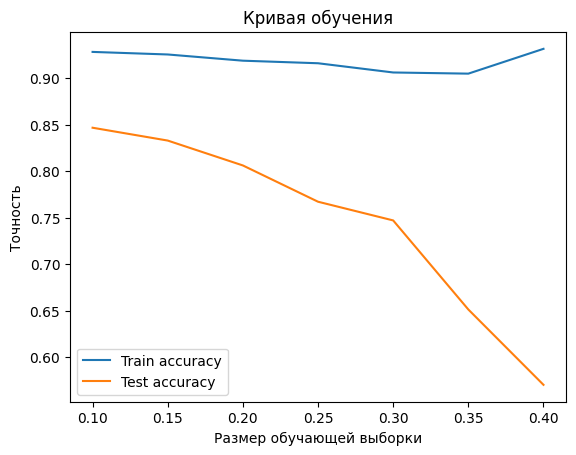

In [31]:
train_sizes = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]

train_accuracies = []
test_accuracies = []

for size in train_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=size, random_state=42)
    model.fit(X_train, y_train)
    
    train_accuracy = model.score(X_train, y_train)
    train_accuracies.append(train_accuracy)
    
    test_accuracy = model.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

plt.plot(train_sizes, train_accuracies, label='Train accuracy')
plt.plot(train_sizes, test_accuracies, label='Test accuracy')
plt.xlabel('Размер обучающей выборки')
plt.ylabel('Точность')
plt.title('Кривая обучения')
plt.legend()
plt.show()

### 9. Выводы
Наша модель покказывает отличные результаты как по метрикам так и по графике.
Как мы, чем меньше наша обучающая выборка и чем больше тестовая, тем сильнее модель недообучена.